In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
import ctypes
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[#0] WARNING:InputArguments -- The parameter 'sigmax' with range [0, 10] of the RooGaussian 'gaussx' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigmay' with range [0, 10] of the RooGaussian 'gaussy' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gaussx,gaussy)
 **********
 **  226 **SET PRINT           1
 **********
 **********
 **  227 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 meanx        2.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 meany       -2.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     3 sigmax       1.00000e+00  5.00000e-01    0.00000e+00  1.00000e+01
     4 sigmay       5.00000e+00  1.00000e+00    0.00000e+00  1.0

Info in <TCanvas::Print>: png file x_var.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas2
Info in <TCanvas::Print>: png file y_var.png has been created


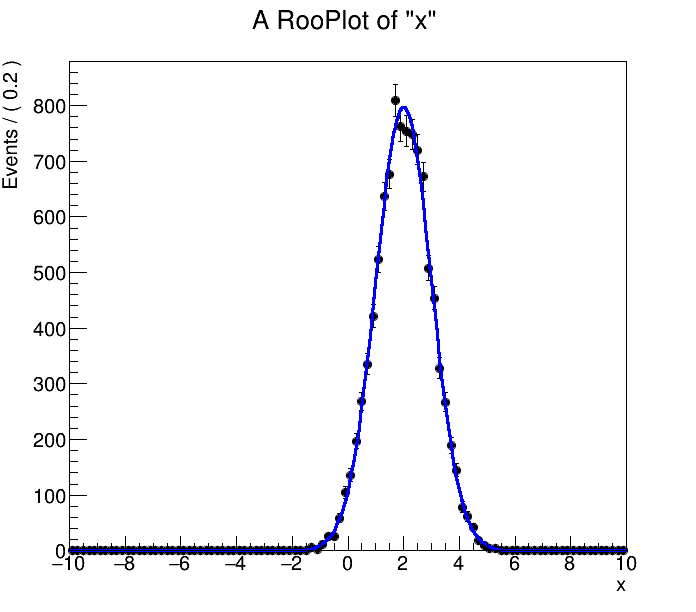

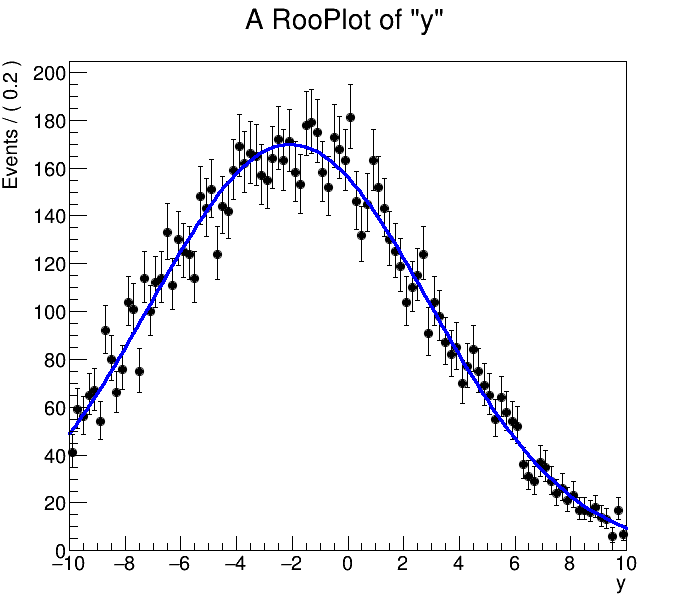

In [34]:
x = ROOT.RooRealVar("x","x",-10,10)
meanx = ROOT.RooRealVar("meanx","meanx",2,-10,10)
sigmax = ROOT.RooRealVar("sigmax","sigmax",1,0.,10.)
gaussx = ROOT.RooGaussian("gaussx","gaussx",x,meanx,sigmax)
y = ROOT.RooRealVar("y","y",-10,10)
meany = ROOT.RooRealVar("meany","meany",-2,-10,10)
sigmay = ROOT.RooRealVar("sigmay","sigmay",5,0.,10.)
gaussy = ROOT.RooGaussian("gaussy","gaussy",y,meany,sigmay)
gaussxy = ROOT.RooProdPdf("gaussxy","gaussxy",ROOT.RooArgSet(gaussx,gaussy))

data = ROOT.RooDataSet(gaussxy.generate(ROOT.RooArgSet(x,y),10000))

canv1 = ROOT.TCanvas("Canvas1", "Canvas1", 700, 640)
canv1.cd(0)
gaussxy.fitTo(data)
framex = x.frame()
data.plotOn(framex)

gaussxy.plotOn(framex)

framex.Draw("PE")
canv1.Update()
canv1.Draw()
canv1.SaveAs('x_var.png')
# canv1.Close()

canv2 = ROOT.TCanvas("Canvas2", "Canvas2", 700, 640)
canv2.cd()
framey = y.frame()
data.plotOn(framey)
gaussxy.plotOn(framey)

framey.Draw("PE")
canv2.Update()
canv2.Draw()
canv2.SaveAs('y_var.png')
